In [ ]:
import torch
from botorch.models import SingleTaskGP
from botorch.models.transforms import Normalize, Standardize
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import LogExpectedImprovement, UpperConfidenceBound
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.optim import optimize_acqf
import numpy as np
import matplotlib.pyplot as plt

def poly(x):
    return (-0.001 * x**6 + 0.003 * x**5 + 0.062 * x**4 - 
            0.174 * x**3 - 0.673 * x**2 + 1.323 * x + 1.764)

def plot_acq_func()

In [29]:
train_X = np.random.uniform(low = -5, high = 5, size = 10)
Y = poly(train_X)
Y = torch.tensor(Y.reshape(-1,1))# + 0.1 * torch.randn_like(Y)  # add some noise
train_X = torch.tensor(train_X.reshape(-1,1))

gp = SingleTaskGP(
  train_X=train_X,
  train_Y=Y,
  input_transform=Normalize(d=1),
  outcome_transform=Standardize(m=1)
)

In [30]:
plot_x = np.linspace(-5,5,100)
plot_y = poly(plot_x)
plot_x_tensor = torch.tensor(plot_x.reshape(-1,1))
with torch.no_grad():
    gp_mean, gp_var = gp.posterior(plot_x_tensor).mean, gp.posterior(plot_x_tensor).variance

In [31]:
logEI = LogExpectedImprovement(model=gp, best_f=Y.max())
EI = logEI(plot_x_tensor.unsqueeze(-2)).detach()

bounds = torch.stack([torch.zeros(1), torch.ones(1)]).to(torch.double)
candidate, acq_value = optimize_acqf(
  logEI, bounds=bounds, q=1, num_restarts=5, raw_samples=20,
)
candidate

tensor([[0.8430]], dtype=torch.float64)

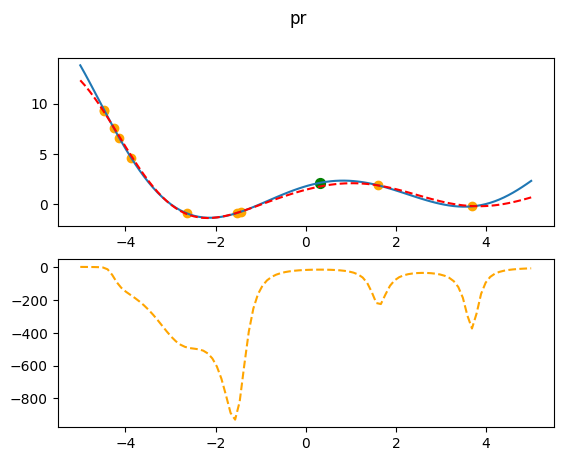

In [27]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('pr')
ax1.plot(plot_x,plot_y)
ax1.scatter(train_X,Y, color = 'orange')
ax1.plot(plot_x_tensor.numpy(), gp_mean.numpy(), label="GP Mean", color="red", linestyle='dashed')
ax1.scatter(candidate, poly(candidate), color = 'green', marker='o', s= 50)

#ax2.set_ylim(-20,10)
ax2.plot(plot_x_tensor.numpy(), EI.numpy(), color="orange", linestyle='dashed')

In [32]:
x= 0.8430
y = (-0.001 * x**6 + 0.003 * x**5 + 0.062 * x**4 - 0.174 * x**3 - 0.673 * x**2 + 1.323 * x + 1.764)
y

2.3290124777173675